# Visualisation tools to map crop and environmental variables regionally

In [3]:
#Import required packages

import os
os.environ["PROJ_LIB"] = r'C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\Library\share'; #fixr
from mpl_toolkits.basemap import Basemap

import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import dateutil
import pylab as py
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, maskoceans
import shapefile
import pandas as pd
import geopandas as gp
import georaster
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os,csv,json,sys,shutil,random
import json, csv, math

#Extend Python window to work better
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
data = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data.csv')
lon = data['lon'].values
lat = data['lat'].values
heat = data['heat_Jday'].values
frost = data['frost_Jday'].values
lentilTOS = data['lentilTOS'].values
beanTOS = data['beanTOS'].values
ID = data['ID'].values
dist_inland = data['dist_inland'].values
alt = data['alt'].values

data0 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data0.csv')
lon0 = data0['lon'].values
lat0 = data0['lat'].values
heat0 = data0['heat_Jday'].values
frost0 = data0['frost_Jday'].values
lentilTOS0 = data0['lentilTOS'].values
beanTOS0 = data0['beanTOS'].values
ID0 = data0['ID'].values
dist_inland0 = data0['dist_inland'].values
alt0 = data0['alt'].values

data00 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data00.csv')
lon00 = data00['lon'].values
lat00 = data00['lat'].values
heat00 = data00['heat_Jday'].values
frost00 = data00['frost_Jday'].values
lentilTOS00 = data00['lentilTOS'].values
beanTOS00 = data00['beanTOS'].values
ID00 = data00['ID'].values
dist_inland00 = data00['dist_inland'].values
alt00 = data00['alt'].values

data1 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data1.csv')
lon1 = data1['lon'].values
lat1 = data1['lat'].values
heat1 = data1['heat_Jday'].values
frost1 = data1['frost_Jday'].values
lentilTOS1 = data1['lentilTOS'].values
beanTOS1 = data1['beanTOS'].values
ID1 = data1['ID'].values

data2 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data2.csv')
lon2 = data2['lon'].values
lat2 = data2['lat'].values
heat2 = data2['heat_Jday'].values
frost2 = data2['frost_Jday'].values
lentilTOS2 = data2['lentilTOS'].values
beanTOS2 = data2['beanTOS'].values
ID2 = data2['ID'].values
type2 = data2['type2'].values

data3 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data3.csv')
lon3 = data3['lon'].values
lat3 = data3['lat'].values
heat3 = data3['heat_Jday'].values
frost3 = data3['frost_Jday'].values
lentilTOS3 = data3['lentilTOS'].values
beanTOS3 = data3['beanTOS'].values
ID3 = data3['ID'].values

data4 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\datasets\data4.csv')
lon4 = data4['lon'].values
lat4 = data4['lat'].values
heat4 = data4['heat_Jday'].values
frost4 = data4['frost_Jday'].values
lentilTOS4 = data4['lentilTOS'].values
beanTOS4 = data4['beanTOS'].values
ID4 = data4['ID'].values

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


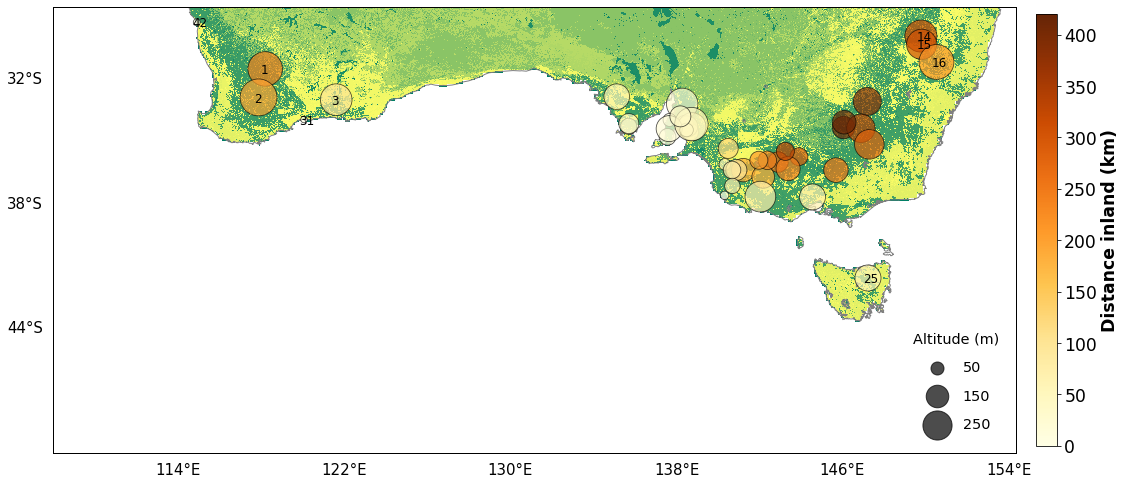

In [50]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=108, \
            llcrnrlat=-50, \
            urcrnrlon=154.35, \
            urcrnrlat=-28.5, \
            resolution='i')

m.drawmapboundary(fill_color='white')
m.drawcoastlines(color="grey")

# labels = [left,right,top,bottom]
parallels = (-32,-38,-44)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=dist_inland, s=alt*4, alpha=0.7, cmap='YlOrBr', linewidths=0.8, edgecolors='k', zorder=5)

for t in range(0,len(dist_inland0)):
    x,y = m(lon0[t]-0.22,lat0[t]-0.22)
    plt.text(x,y,ID0[t],size=12,zorder=10)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.0215, pad=0.02)
cb.set_label(label='Distance inland (km)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(0, 420)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [50, 150, 250]:
    plt.scatter([], [], c='k', alpha=0.7, s=a*3.4, label=str(a))

legend= plt.legend(title="Altitude (m)",fontsize='x-large',scatterpoints=1, frameon=False, labelspacing=1, bbox_to_anchor=(0.88, 0.3), loc=2);
plt.setp(legend.get_title(),fontsize='x-large')

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=1, cmap=plt.cm.summer)
m.drawlsmask(land_color='none',ocean_color='white', zorder=1.5)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


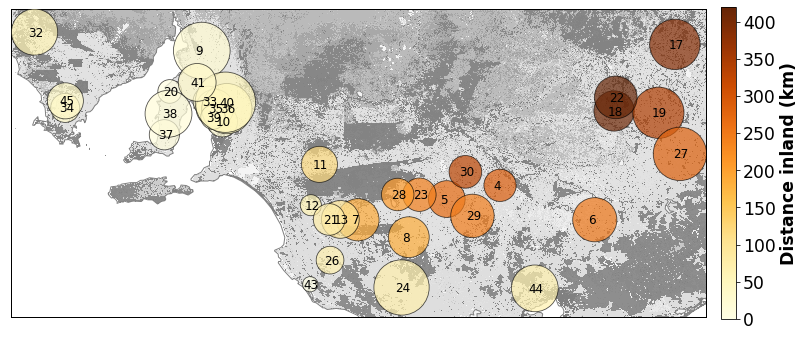

In [87]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=134.7, \
            llcrnrlat=-38.2, \
            urcrnrlon=147.8, \
            urcrnrlat=-32.4, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=dist_inland, s=alt*13, alpha=0.7, cmap='YlOrBr', linewidths=0.8, edgecolors='k', zorder=5)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.0215, pad=0.02)
cb.set_label(label='Distance inland (km)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(0, 420)
cb.set_alpha(1)
cb.draw_all()

for t in range(0,len(dist_inland00)):
    x,y = m(lon00[t]-0.12,lat00[t]-0.08)
    plt.text(x,y,ID00[t],size=12,zorder=10)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\distance_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


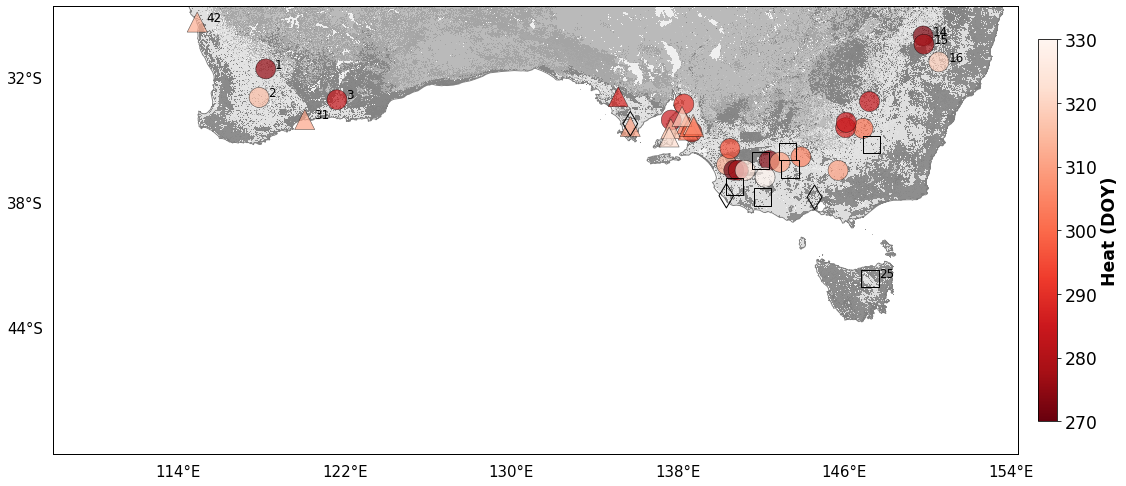

In [19]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=108, \
            llcrnrlat=-50, \
            urcrnrlon=154.35, \
            urcrnrlat=-28.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# labels = [left,right,top,bottom]
parallels = (-32,-38,-44)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=heat1, s=400, alpha=0.7, cmap='Reds_r',linewidths=0.5, edgecolors='k', zorder=5)
# plot type3 data color triangles
m.scatter(lon3, lat3, latlon=True, c=heat3, s=400, marker='^', alpha=0.7, cmap='Reds_r',linewidths=0.5, edgecolors='k', zorder=5)

#plot number for locations
for t in range(0,len(heat0)):
    x,y = m(lon0[t]+0.45,lat0[t]+0.05)
    plt.text(x,y,ID0[t],size=12,zorder=10)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='Heat (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(270, 330)
cb.set_alpha(1)
cb.draw_all()

# plot type2 data black squares
m.scatter(lon2, lat2, latlon=True, s=300, alpha=1, facecolors='none', marker='s', color='k',linewidths=1, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=300, alpha=1, facecolors='none', marker='d', color='k',linewidths=1, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\heat_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


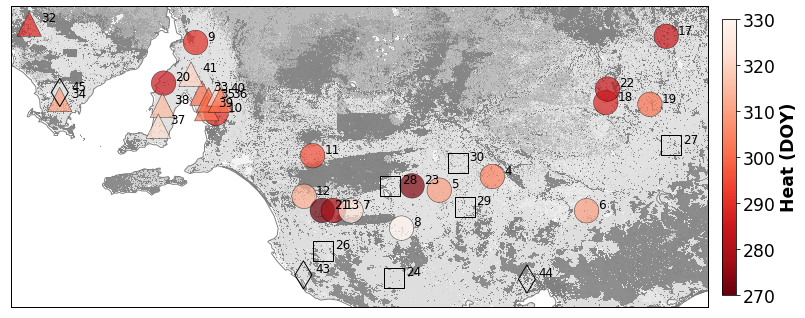

In [77]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=134.8, \
            llcrnrlat=-38.2, \
            urcrnrlon=148, \
            urcrnrlat=-32.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=heat1, s=600, alpha=0.7, cmap='Reds_r',linewidths=0.5, edgecolors='k', zorder=5)
# plot type3 data color triangles
m.scatter(lon3, lat3, latlon=True, c=heat3, s=600, marker='^', alpha=0.7, cmap='Reds_r',linewidths=0.5, edgecolors='k', zorder=5)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='Heat (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(270, 330)
cb.set_alpha(1)
cb.draw_all()


#plot number for locations
for t in range(0,len(heat00)):
    x,y = m(lon00[t]+0.22,lat00[t]+0.05)
    plt.text(x,y,ID00[t],size=12,zorder=10)

# plot type2 data black squares
m.scatter(lon2, lat2, latlon=True, s=400, alpha=1, facecolors='none', marker='s', color='k',linewidths=1, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=400, alpha=1, facecolors='none', marker='d', color='k',linewidths=1, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\heat_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


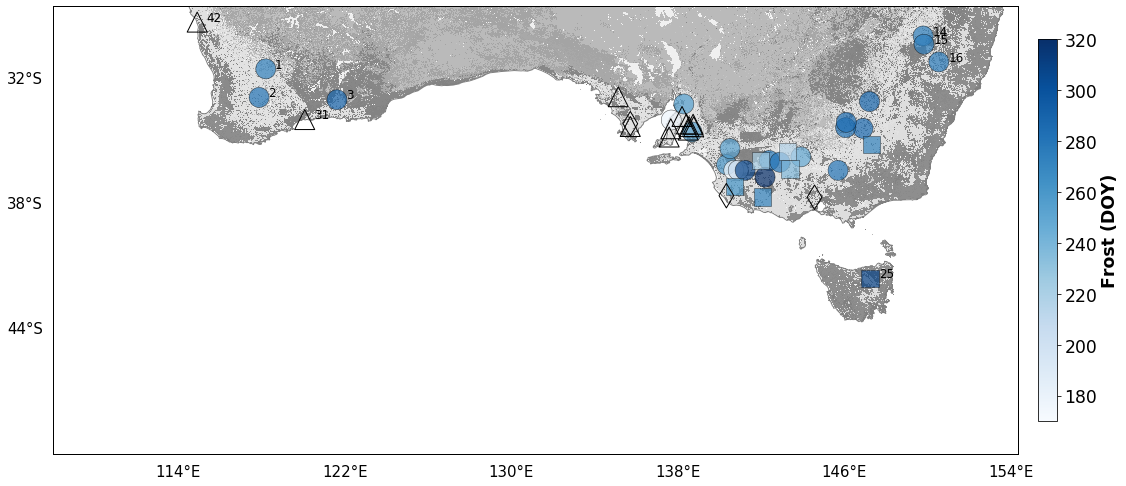

In [7]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=108, \
            llcrnrlat=-50, \
            urcrnrlon=154.35, \
            urcrnrlat=-28.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# labels = [left,right,top,bottom]
parallels = (-32,-38,-44)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=frost1, s=400, alpha=0.7, cmap='Blues',linewidths=0.5, edgecolors='k', zorder=5)
# plot type2 data color squares
m.scatter(lon2, lat2, latlon=True, c=frost2, s=300, alpha=0.7, cmap='Blues', marker='s', linewidths=0.5, edgecolors='k', zorder=5)

#plot number for locations
for t in range(0,len(frost0)):
    x,y = m(lon0[t]+0.45,lat0[t]+0.05)
    plt.text(x,y,ID0[t],size=12,zorder=10)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='Frost (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(170, 320)
cb.set_alpha(1)
cb.draw_all()

# plot type3 data black triangles
m.scatter(lon3, lat3, latlon=True, s=400, alpha=1, facecolors='none', marker='^', color='k',linewidths=1, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=300, alpha=1, facecolors='none', marker='d', color='k',linewidths=1, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\frost_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


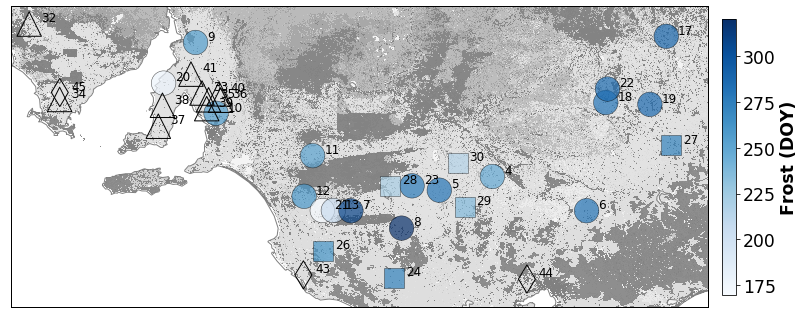

In [78]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=134.8, \
            llcrnrlat=-38.2, \
            urcrnrlon=148, \
            urcrnrlat=-32.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=frost1, s=600, alpha=0.7, cmap='Blues',linewidths=0.5, edgecolors='k', zorder=5)
# plot type2 data color squares
m.scatter(lon2, lat2, latlon=True, c=frost2, s=400, alpha=0.7, cmap='Blues', marker='s', linewidths=0.5, edgecolors='k', zorder=5)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='Frost (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(170, 320)
cb.set_alpha(1)
cb.draw_all()

#plot number for locations
for t in range(0,len(frost00)):
    x,y = m(lon00[t]+0.22,lat00[t]+0.05)
    plt.text(x,y,ID00[t],size=12,zorder=10)

# plot type3 data black triangles
m.scatter(lon3, lat3, latlon=True, s=600, alpha=1, facecolors='none', marker='^', color='k',linewidths=1, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=400, alpha=1, facecolors='none', marker='d', color='k',linewidths=1, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\frost_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


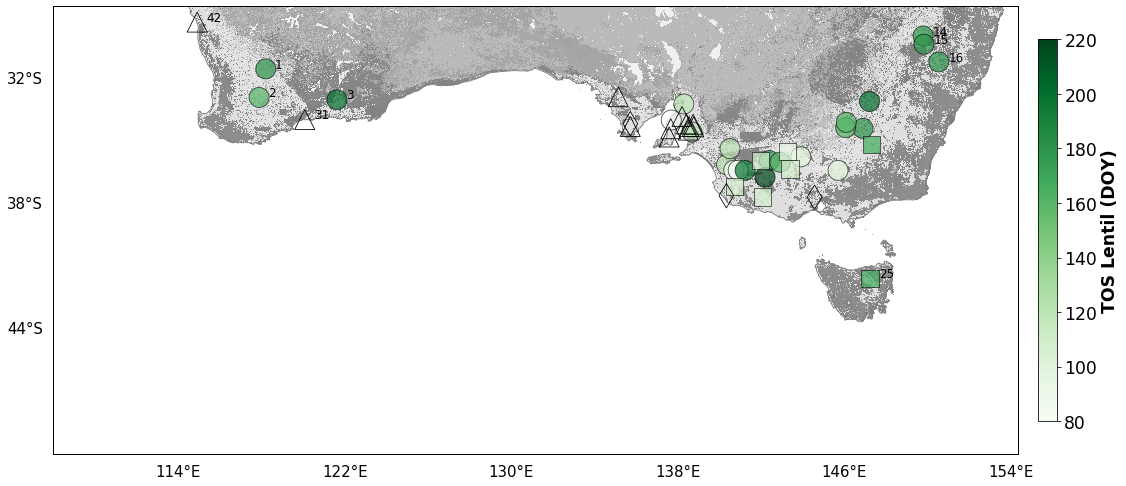

In [9]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=108, \
            llcrnrlat=-50, \
            urcrnrlon=154.35, \
            urcrnrlat=-28.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# labels = [left,right,top,bottom]
parallels = (-32,-38,-44)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=lentilTOS1, s=400, alpha=0.7, cmap='Greens', linewidths=0.8, edgecolors='k', zorder=5)
# plot type2 data black squares
m.scatter(lon2, lat2, latlon=True, c=lentilTOS2, s=300, alpha=0.7, cmap='Greens', marker='s', linewidths=0.8, edgecolors='k', zorder=5)

#plot number for locations
for t in range(0,len(lentilTOS0)):
    x,y = m(lon0[t]+0.45,lat0[t]+0.05)
    plt.text(x,y,ID0[t],size=12,zorder=10)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='TOS Lentil (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(80, 220)
cb.set_alpha(1)
cb.draw_all()

# plot type3 data color triangles
m.scatter(lon3, lat3, latlon=True, s=400, alpha=1, facecolors='none', marker='^', color='k', linewidths=0.8, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=300, alpha=1, facecolors='none', marker='d', color='k',linewidths=0.8, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\lentilTOS_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


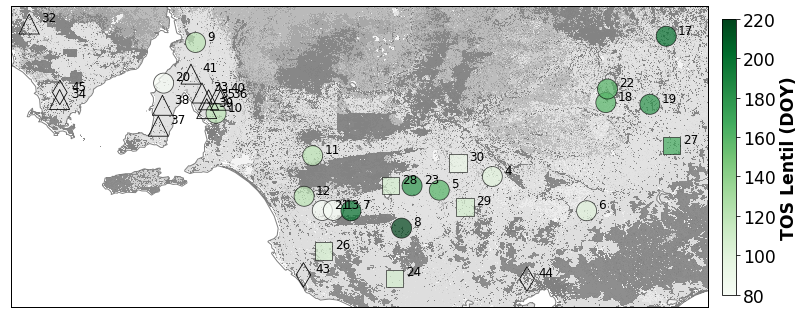

In [79]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=134.8, \
            llcrnrlat=-38.2, \
            urcrnrlon=148, \
            urcrnrlat=-32.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=lentilTOS1, s=400, alpha=0.7, cmap='Greens', linewidths=0.8, edgecolors='k', zorder=5)
# plot type2 data black squares
m.scatter(lon2, lat2, latlon=True, c=lentilTOS2, s=300, alpha=0.7, cmap='Greens', marker='s', linewidths=0.8, edgecolors='k', zorder=5)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='TOS Lentil (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(80, 220)
cb.set_alpha(1)
cb.draw_all()

#plot number for locations
for t in range(0,len(frost00)):
    x,y = m(lon00[t]+0.22,lat00[t]+0.05)
    plt.text(x,y,ID00[t],size=12,zorder=10)

# plot type3 data color triangles
m.scatter(lon3, lat3, latlon=True, s=400, alpha=1, facecolors='none', marker='^', color='k', linewidths=0.8, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=300, alpha=1, facecolors='none', marker='d', color='k',linewidths=0.8, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\lentilTOS_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


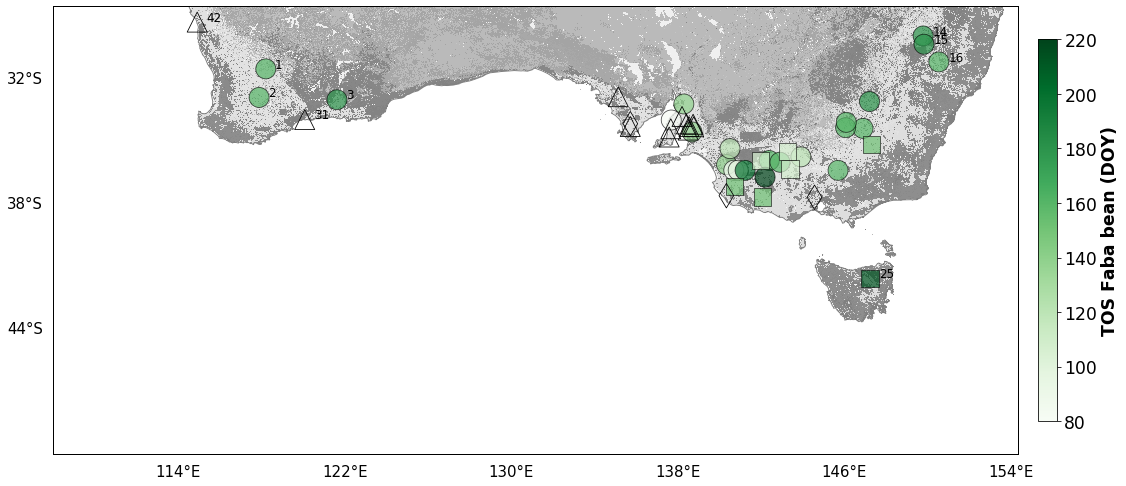

In [11]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=108, \
            llcrnrlat=-50, \
            urcrnrlon=154.35, \
            urcrnrlat=-28.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# labels = [left,right,top,bottom]
parallels = (-32,-38,-44)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=beanTOS1, s=400, alpha=0.7, cmap='Greens', linewidths=0.8, edgecolors='k', zorder=5)
# plot type2 data black squares
m.scatter(lon2, lat2, latlon=True, c=beanTOS2, s=300, alpha=0.7, cmap='Greens', marker='s', linewidths=0.8, edgecolors='k', zorder=5)

#plot number for locations
for t in range(0,len(beanTOS0)):
    x,y = m(lon0[t]+0.45,lat0[t]+0.05)
    plt.text(x,y,ID0[t],size=12,zorder=10)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='TOS Faba bean (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(80, 220)
cb.set_alpha(1)
cb.draw_all()

# plot type3 data color triangles
m.scatter(lon3, lat3, latlon=True, s=400, alpha=1, facecolors='none', marker='^', color='k', linewidths=0.8, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=300, alpha=1, facecolors='none', marker='d', color='k',linewidths=0.8, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\beanTOS_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


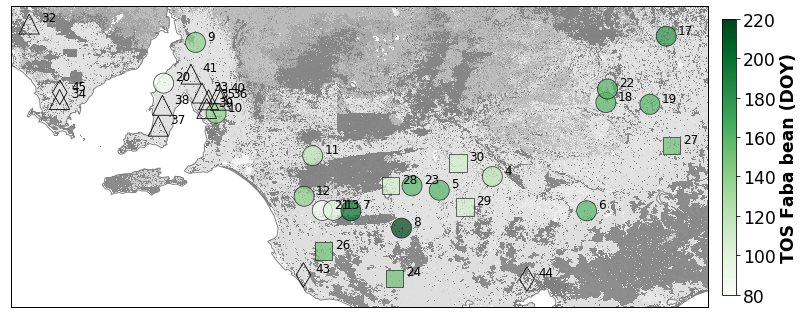

In [80]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=134.8, \
            llcrnrlat=-38.2, \
            urcrnrlon=148, \
            urcrnrlat=-32.5, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot type1 data color circles
m.scatter(lon1, lat1, latlon=True, c=beanTOS1, s=400, alpha=0.7, cmap='Greens', linewidths=0.8, edgecolors='k', zorder=5)
# plot type2 data black squares
m.scatter(lon2, lat2, latlon=True, c=beanTOS2, s=300, alpha=0.7, cmap='Greens', marker='s', linewidths=0.8, edgecolors='k', zorder=5)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='TOS Faba bean (DOY)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(80, 220)
cb.set_alpha(1)
cb.draw_all()

#plot number for locations
for t in range(0,len(frost00)):
    x,y = m(lon00[t]+0.22,lat00[t]+0.05)
    plt.text(x,y,ID00[t],size=12,zorder=10)

# plot type3 data color triangles
m.scatter(lon3, lat3, latlon=True, s=400, alpha=1, facecolors='none', marker='^', color='k', linewidths=0.8, edgecolors='k', zorder=7)
# plot type4 data black diamonts
m.scatter(lon4, lat4, latlon=True, s=300, alpha=1, facecolors='none', marker='d', color='k',linewidths=0.8, edgecolors='k', zorder=7)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=1, alpha=0.5, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\revised\beanTOS_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)